In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 



In [3]:
import pandas as pd

dataset = pd.read_excel("E:/CV & resume/HousePricePrediction.xlsx")


In [4]:
# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [5]:
dataset.shape


(2919, 13)

In [6]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


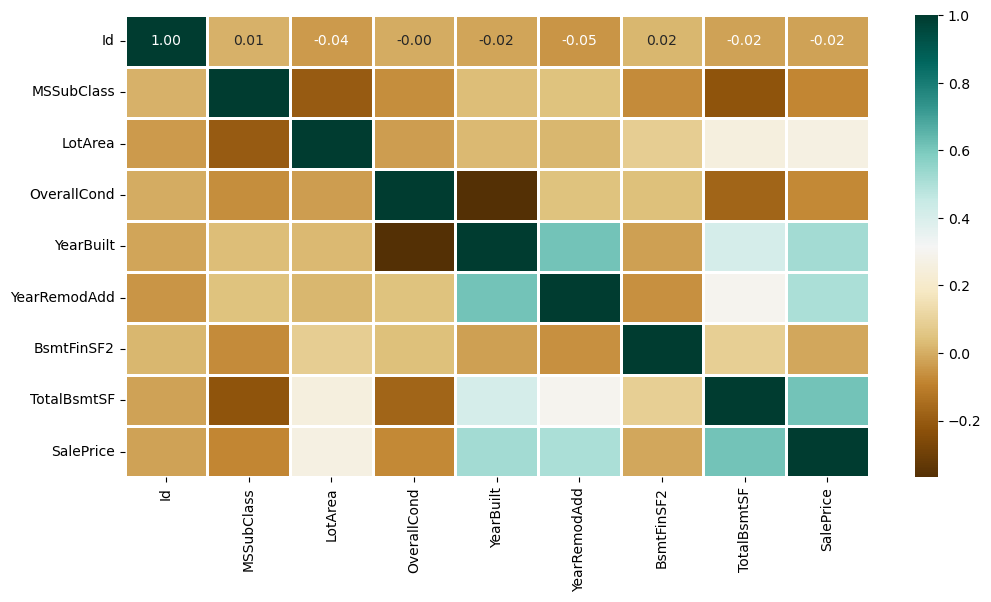

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.show()


C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

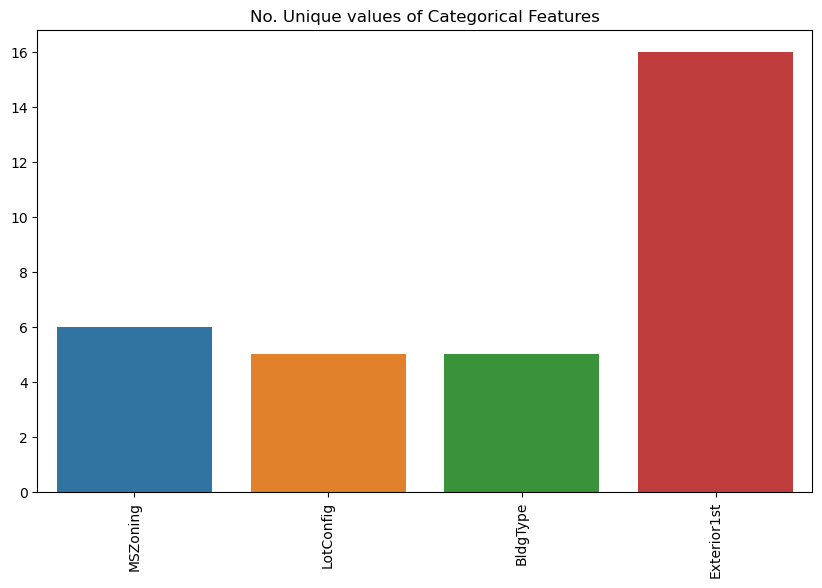

In [10]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)


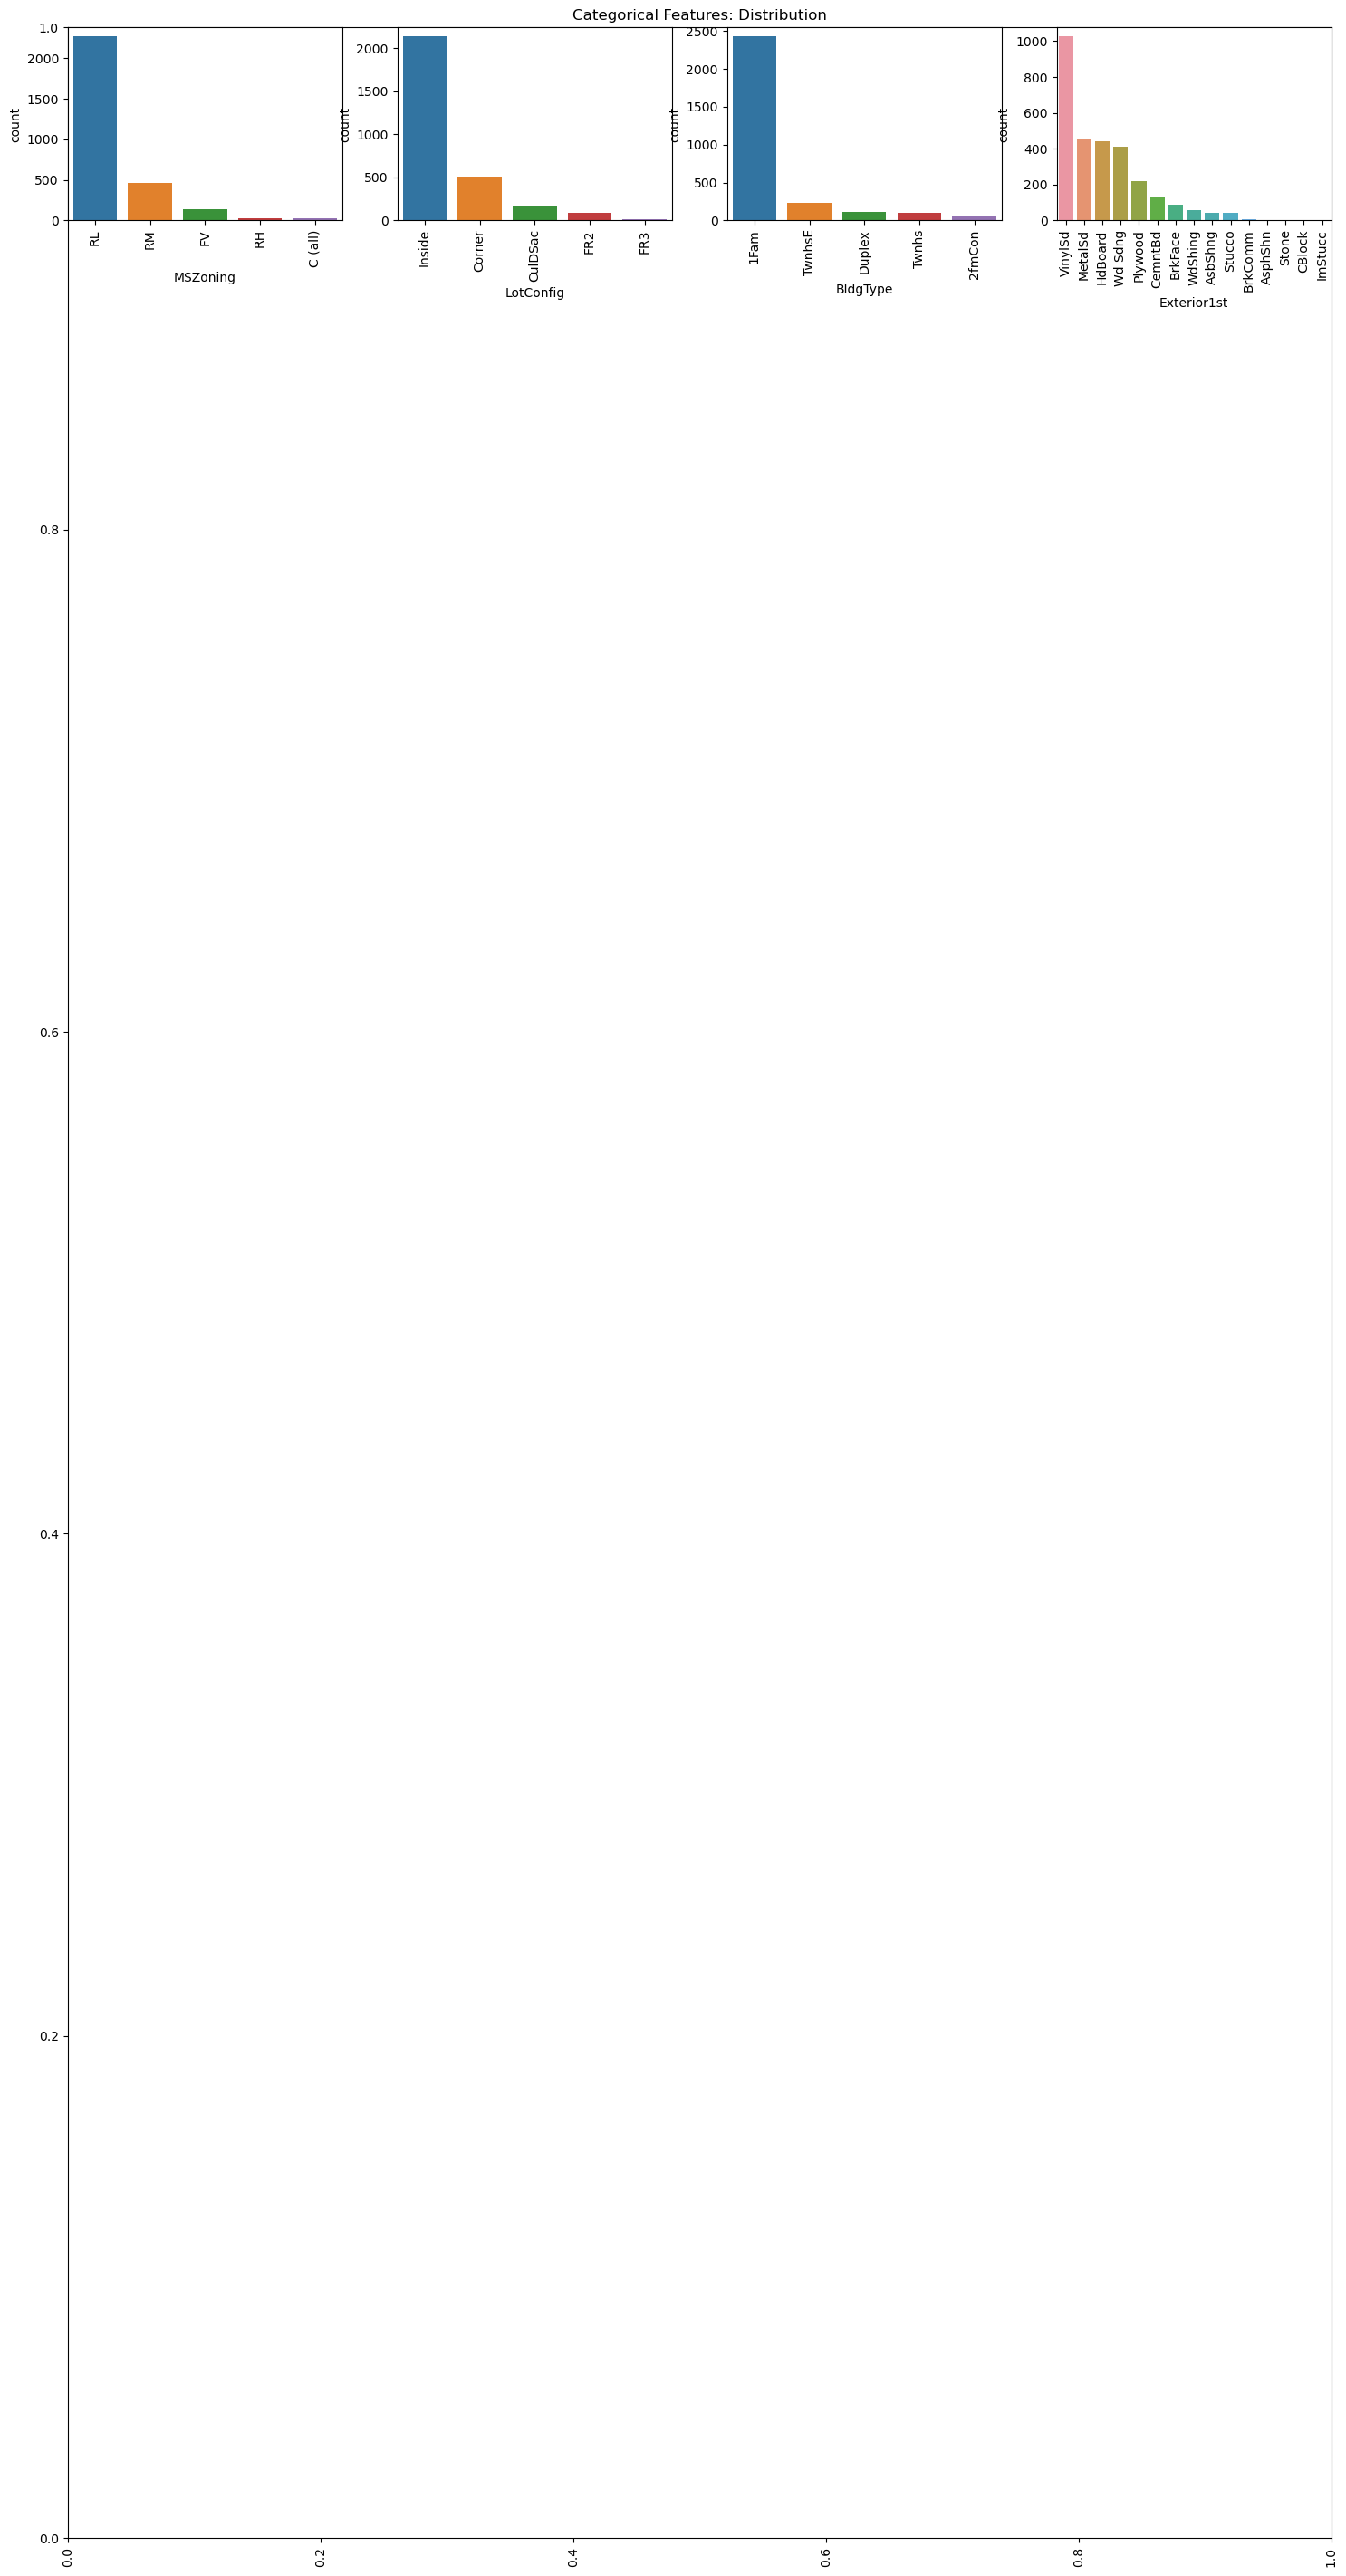

In [15]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=y.index, y=y)  # Use y.index directly instead of list(y.index)
    index += 1


In [17]:
column_to_drop = 'Id'
if column_to_drop in dataset.columns:
    dataset.drop([column_to_drop], axis=1, inplace=True)
else:
    print(f"Column '{column_to_drop}' not found in the dataset.")


Column 'Id' not found in the dataset.


In [18]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [19]:
new_dataset = dataset.dropna()


In [20]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [23]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index

# Use get_feature_names_out instead of get_feature_names
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [26]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.18552392221102829

In [27]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599951


In [29]:
# Use a Jupyter Notebook cell magic command to install the package
!pip install catboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 330.3 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 471.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 0.2/101.0 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.4/101.0 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.7/101.0 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 0.7/101.0 MB 3.9 MB/s eta 0:00:26
   --------------

In [35]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Create a simple DataFrame for demonstration
data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [5, 4, 3, 2, 1],
        'target_column': [10, 20, 30, 40, 50]}

df = pd.DataFrame(data)

# Replace 'target_column' with the actual name of your target column
X = df.drop('target_column', axis=1)
y = df['target_column']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the CatBoostRegressor model
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)

# Make predictions on the validation set
preds = cb_model.predict(X_valid)

# Evaluate the model
cb_r2_score = r2_score(y_valid, preds)
cb_r2_score


Learning rate set to 0.017112
0:	learn: 14.7300084	total: 140ms	remaining: 2m 20s
1:	learn: 14.6669934	total: 141ms	remaining: 1m 10s
2:	learn: 14.6065986	total: 141ms	remaining: 46.8s
3:	learn: 14.5350303	total: 141ms	remaining: 35.2s
4:	learn: 14.4728495	total: 142ms	remaining: 28.2s
5:	learn: 14.4133476	total: 142ms	remaining: 23.5s
6:	learn: 14.3523648	total: 142ms	remaining: 20.2s
7:	learn: 14.2918282	total: 142ms	remaining: 17.7s
8:	learn: 14.2306877	total: 143ms	remaining: 15.7s
9:	learn: 14.1698089	total: 143ms	remaining: 14.2s
10:	learn: 14.1120504	total: 143ms	remaining: 12.9s
11:	learn: 14.0545576	total: 143ms	remaining: 11.8s
12:	learn: 13.9860321	total: 144ms	remaining: 10.9s
13:	learn: 13.9170328	total: 144ms	remaining: 10.2s
14:	learn: 13.8484572	total: 144ms	remaining: 9.49s
15:	learn: 13.7902831	total: 145ms	remaining: 8.9s
16:	learn: 13.7224162	total: 145ms	remaining: 8.39s
17:	learn: 13.6637117	total: 145ms	remaining: 7.93s
18:	learn: 13.6052584	total: 146ms	remainin

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [36]:
feature_importance = cb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


    Feature  Importance
0  Feature1   53.185113
1  Feature2   46.814887


In [37]:
new_data = pd.DataFrame({'Feature1': [6, 7], 'Feature2': [2, 3]})
new_preds = cb_model.predict(new_data)
print(new_preds)


[44.85532593 39.03335001]


In [38]:
# This code is contributed by @amartajisce
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score


Learning rate set to 0.017112
0:	learn: 14.7300084	total: 447us	remaining: 448ms
1:	learn: 14.6669934	total: 1.08ms	remaining: 541ms
2:	learn: 14.6065986	total: 1.52ms	remaining: 505ms
3:	learn: 14.5350303	total: 1.74ms	remaining: 434ms
4:	learn: 14.4728495	total: 2.13ms	remaining: 423ms
5:	learn: 14.4133476	total: 2.36ms	remaining: 391ms
6:	learn: 14.3523648	total: 2.61ms	remaining: 370ms
7:	learn: 14.2918282	total: 2.86ms	remaining: 355ms
8:	learn: 14.2306877	total: 3.24ms	remaining: 357ms
9:	learn: 14.1698089	total: 3.71ms	remaining: 367ms
10:	learn: 14.1120504	total: 3.97ms	remaining: 357ms
11:	learn: 14.0545576	total: 4.33ms	remaining: 356ms
12:	learn: 13.9860321	total: 4.53ms	remaining: 344ms
13:	learn: 13.9170328	total: 4.88ms	remaining: 344ms
14:	learn: 13.8484572	total: 5.2ms	remaining: 341ms
15:	learn: 13.7902831	total: 5.46ms	remaining: 336ms
16:	learn: 13.7224162	total: 5.69ms	remaining: 329ms
17:	learn: 13.6637117	total: 5.96ms	remaining: 325ms
18:	learn: 13.6052584	total:

ValueError: Found input variables with inconsistent numbers of samples: [583, 1]